# Temperature Forecast Project using ML

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


# Data Pre-processing

Data Pre-processing refers to Data Integration, Data Analysis, Data cleaning, Data Transformation, and Dimension Reduction

Data preprocessing is the process of cleaning and preparing the raw data to enable feature engineering

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [169]:
temp_df=pd.read_csv('Temperature.csv')

In [170]:
temp_df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [171]:
temp_df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [172]:
temp_df.shape

(7752, 25)

In the above datasets there are 7752 observations and  columns

In [173]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In the baove data sets null value are present in the datsets,  all the columns are float type datasest except data, data is present in the object format later it will be converted in Data format

In [174]:
temp_df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In the above data sets there is no identifier or constant columns. Looking at data it looks like we have a data fro 310 dates

In [175]:
temp_df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are several null values present in the data sets

In [176]:
# Finding the percentage of null value in case there is null values in features
(temp_df.isnull().sum()/(len(temp_df)))*100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

<AxesSubplot:>

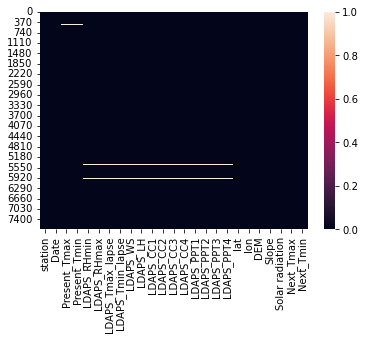

In [177]:
#Sns is the library sns-seaborn library
#lets visualize it using heatmap for null values
sns.heatmap(temp_df.isnull())

# Data Reduction

Some columns or variables can be dropped if they do not add value to our analysis

# Feature Engineering

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

All the data are meaningful data

Data Cleaning/Wrangling

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

All the datas are relevent to and easy to understand, there is no data entry error in this dataframe and also there is no need to convert the variable data

here it is done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process

# EDA Exploratory Data Analysis

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.

EDA helps to find meaningful patterns in data.

EDA provides in-depth insights into the data sets to solve our business problems.

EDA gives a clue to impute missing values in the dataset

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [178]:
temp_df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

The Count shows there is null values beacuse all the columns are not same values

#Stad Deviation #min - miniumum value of all the values #25% -Quartile -1st quartile

#50% -Quartile- and its also say median -2nd quartile

#75% -Quaratile -3rd quartile

#Max - are largest value



Before we do EDA, lets separate Numerical and categorical variables for easy analysis- in case nay numerical and categorical values are there

In [179]:
#Separting Numerical and categorical column

categorical_col = []
for i in temp_df.dtypes.index:
    if temp_df.dtypes[i] == "object":     #dtypes[i]-dtypes of any columns object it will append that columns in empty list 
        categorical_col.append(i)    #append method is used to add the value in your existing list
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
#Explanatory mark is used for not- when the condition my datatype is not object in that time  
#cont--is not satisifed in that time it append the numerical list
numerical_col = []        #creating empty list
for i in temp_df.dtypes.index:
    if temp_df.dtypes[i]!='object':      
        numerical_col.append(i)
print("Numerical Columns:", numerical_col)

Categorical Columns: ['Date']


Numerical Columns: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


# Data Visualization

Univariate Analysis

2.785000    310
0.514100    310
0.271300    310
0.222300    310
0.155400    310
0.133200    310
0.572100    310
4.729600    310
1.767800    310
1.231300    310
0.697000    310
2.257900    310
0.855200    310
0.618000    310
2.686500    310
0.593100    310
0.623300    310
5.178200    310
0.412500    310
1.562900    310
0.098500    310
0.145700    310
0.505500    310
2.534800    310
0.266100    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

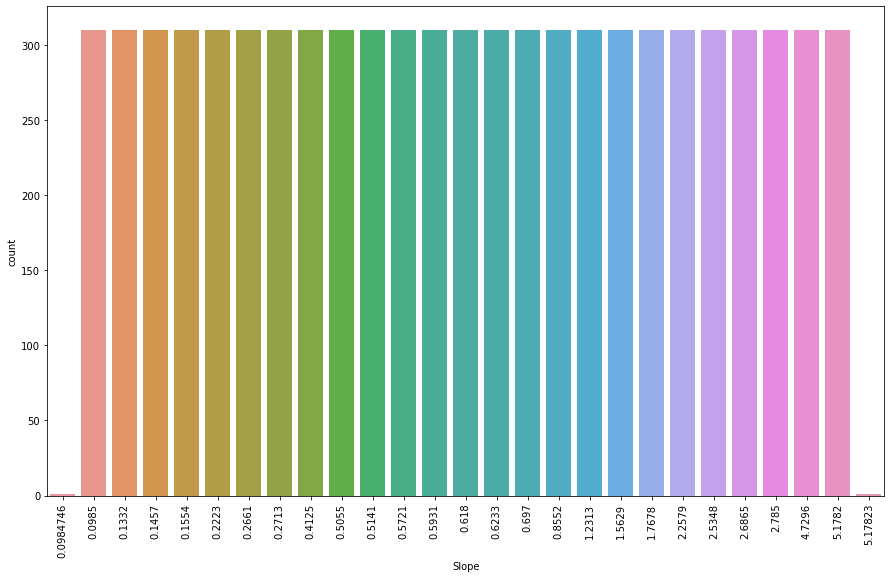

In [180]:
plt.figure(figsize=(15, 9))
sns.countplot(x='Slope',data=temp_df)
plt.xticks(rotation=90)
temp_df['Slope'].value_counts()

All the slope have a equal no of count except to slope which have only one count each, these are values related to round 

212.3350    311
12.3700     311
30.9680     310
17.2956     310
15.5876     310
21.9668     310
26.2980     310
146.5540    310
75.0924     310
56.4448     310
53.4712     310
82.2912     310
30.0464     310
59.8324     310
44.7624     310
132.1180    310
28.7000     310
208.5070    310
50.9312     310
52.5180     310
54.6384     310
35.0380     310
45.7160     310
33.3068     310
19.5844     310
Name: DEM, dtype: int64

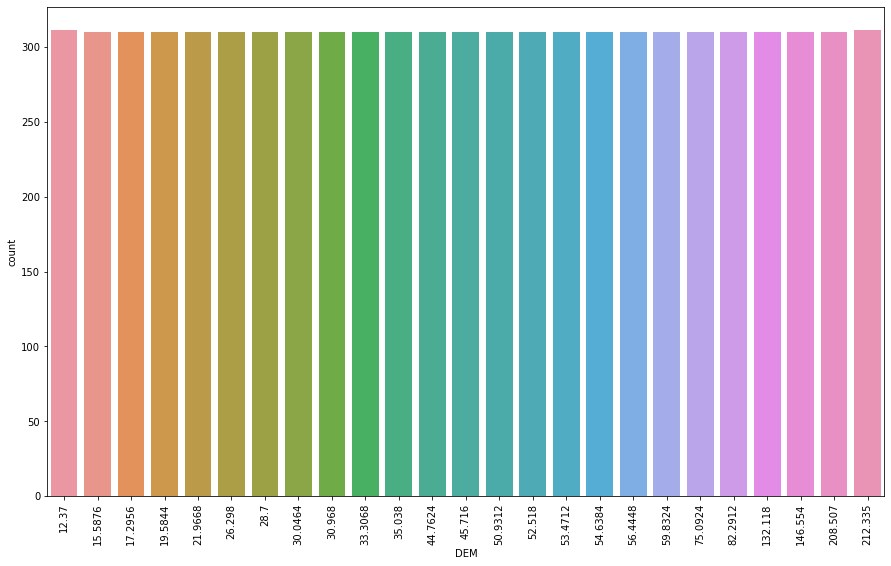

In [181]:
plt.figure(figsize=(15, 9))
sns.countplot(x='DEM',data=temp_df)
plt.xticks(rotation=90)
temp_df['DEM'].value_counts()

all the elevation have equal count except to values

37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

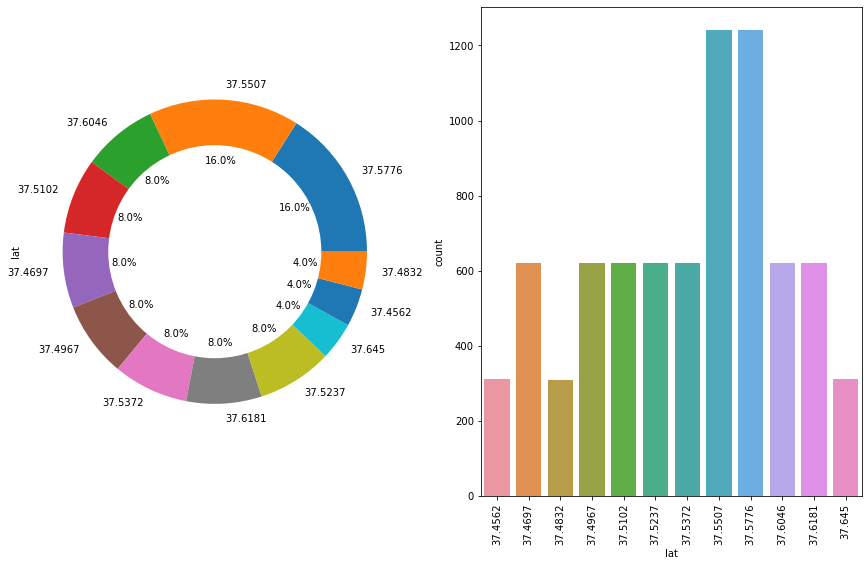

In [182]:
plt.figure(figsize=(15, 9))
plt.subplot(1,2,1)
temp_df['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=temp_df)
plt.xticks(rotation=90)
temp_df['lat'].value_counts()

these are 12 latitude present, two of which have highest count equal to 1240, while 7 are 620 count, and rest three have less than 325

In [183]:
plt.figure(figsize=(15, 9))
plt.subplot(1,2,1)
temp_df['lon'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lon',data=temp_df)
plt.xticks(rotation=90)
temp_df['lon'].value_counts()

127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: lon, dtype: int64

all the value have equal count except two value rom the datsets

In [184]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.histplot(temp_df['Present_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(temp_df['Present_Tmin'],kde=True,color='r')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(temp_df['Present_Tmax'].min(),temp_df['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(temp_df['Present_Tmin'].min(),temp_df['Present_Tmin'].max()))

Minimum Tmax is 20.0 and Maximum Tmax is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


present tmax and tmin are almost distributed equally, min Tmax is 20 and max Tmax is 37.6 in all day temp is 27.5 & Tmin is min of 11.3 and max of 29.9 in normal days 22.5

In [185]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.histplot(temp_df['LDAPS_RHmin'],kde=True,color='b')
plt.title('minimum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(temp_df['LDAPS_RHmax'],kde=True,color='r')
plt.title('maximum relative humidity (%)')
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(temp_df['LDAPS_RHmin'].min(),temp_df['LDAPS_RHmin'].max()))
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(temp_df['LDAPS_RHmax'].min(),temp_df['LDAPS_RHmax'].max()))

Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345
Minimum RHmax is 58.93628311 and Maximum RHmax is 100.0001526


The data of the maximum relative humidity is left skewed, minimum relative humidity is right skewed

Minimum Tmax is 17.62495378 and Maximum Tmax is 38.54225522
Minimum Tmin is 14.27264631 and Maximum Tmin is 29.61934244


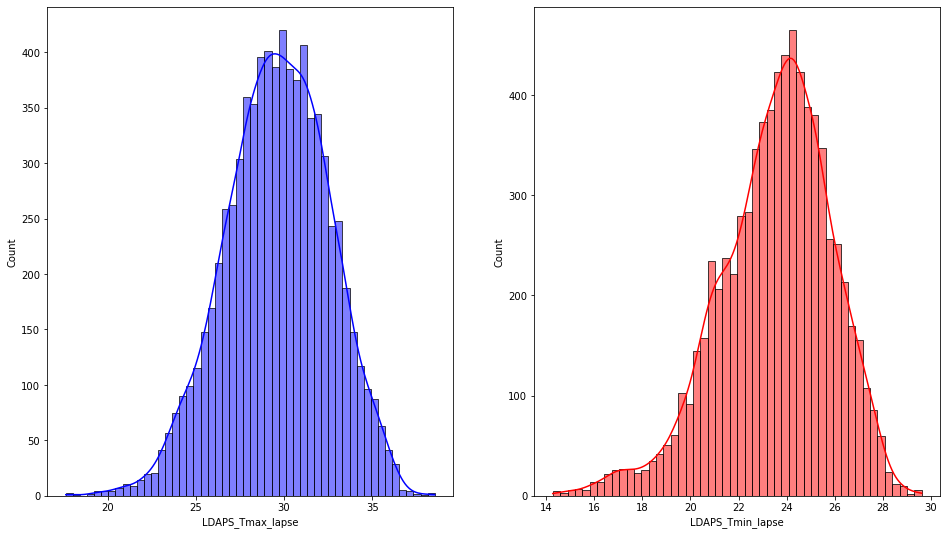

In [186]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.histplot(temp_df['LDAPS_Tmax_lapse'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(temp_df['LDAPS_Tmin_lapse'],kde=True,color='r')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(temp_df['LDAPS_Tmax_lapse'].min(),temp_df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(temp_df['LDAPS_Tmin_lapse'].min(),temp_df['LDAPS_Tmin_lapse'].max()))

min & Tmax applied lapse rates are normally distributed, with Tmax lapse having maximum temp  34.54,  mini- 17.62 , Tmin_lapse of  minium value is 14.27 and max of 29.61

In [187]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.histplot(temp_df['LDAPS_WS'],kde=True,color='b')
plt.title('average wind speed (m/s)')
print('Minimum w/s is {} and Maximum w/s is {}'.format(temp_df['LDAPS_WS'].min(),temp_df['LDAPS_WS'].max()))

Minimum w/s is 2.882579625 and Maximum w/s is 21.85762099


The data of average wind speed is right skewed,  it has minimum wind speed is 2.88 m/s and max wind speed is 21.85 m/s

In [188]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.histplot(temp_df['LDAPS_LH'],kde=True,color='b')
plt.title('average latent heat flux (W/m2)')
print('Minimum w/m2 is {} and Maximum w/m2 is {}'.format(temp_df['LDAPS_LH'].min(),temp_df['LDAPS_LH'].max()))

Minimum w/m2 is -13.60321209 and Maximum w/m2 is 213.4140062


Latent heat flux seems to be normally distributed with slight skewness to the right. It has its minimum value at -13.60 and maximum values at 213.41 and majority of its values lies in the range 30 to 70.

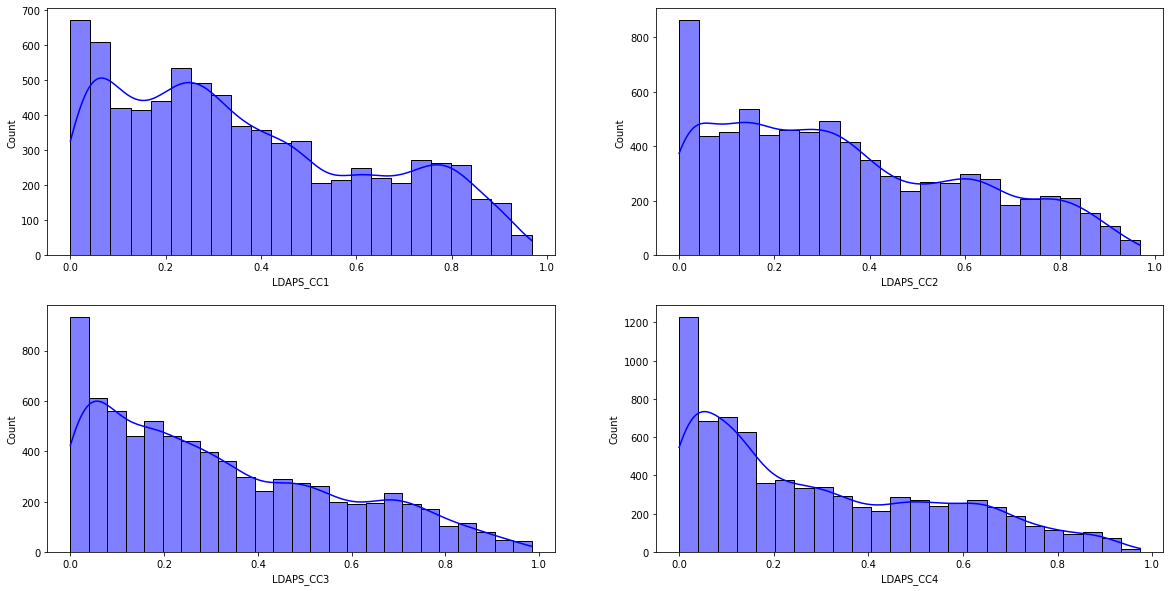

In [189]:
cloud_cover=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
fig,ax=plt.subplots(2,2, figsize=(20,10))
r=0
c=0
for i, n in enumerate(cloud_cover):
    if i%2==0 and i>1:
        r+=1
        c=0
    sns.histplot(temp_df[n], kde=True, color='b', ax=ax[r,c])
    c+=1

cloud cover data for  all the 6 hour split is right skewed 

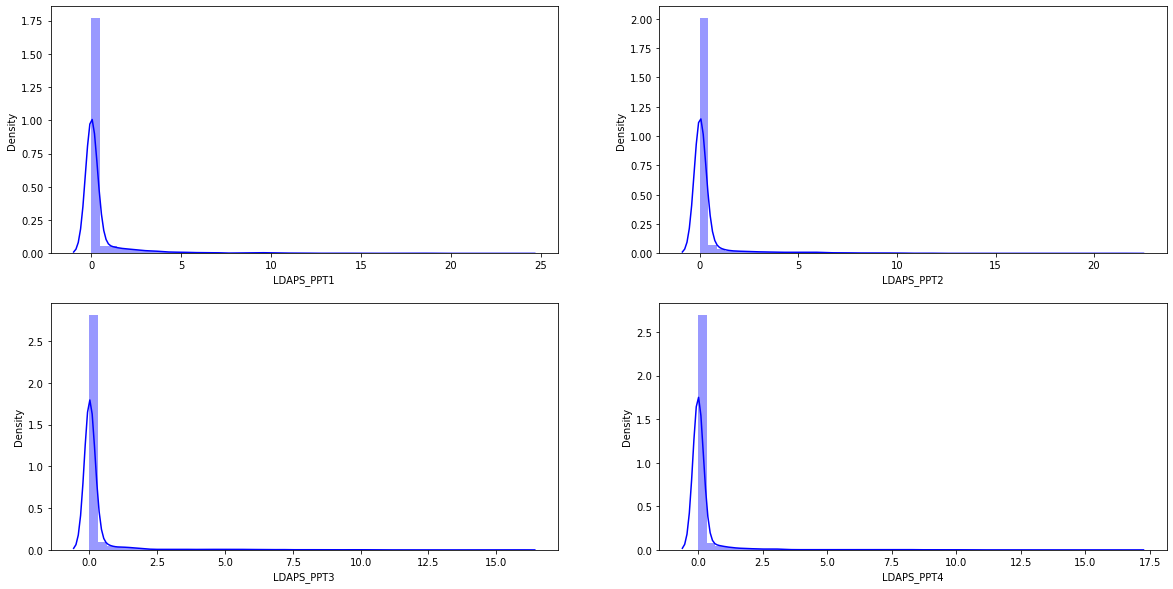

In [190]:
precipitation=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
fig,ax=plt.subplots(2,2, figsize=(20,10))
r=0
c=0
for i, n in enumerate(precipitation):
    if i%2==0 and i>1:
        r+=1
        c=0
    sns.distplot(temp_df[n], kde=True, color='b', ax=ax[r,c])
    c+=1

Precipitation data for all the 6 hour split is right skewed and majority of all the splits values lie close to 0.

In [191]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.histplot(temp_df['Solar radiation'],kde=True,color='b')
plt.title('Daily incoming solar radiation (wh/m2)')
print('Minimum w/m2 is {} and Maximum w/m2 is {}'.format(temp_df['Solar radiation'].min(),temp_df['Solar radiation'].max()))

Minimum w/m2 is 4329.520508 and Maximum w/m2 is 5992.895996


incoming solar radiation is left skewed it has minimum value is 4329 and maximum value is 5992

In [192]:
#Separating categorical and continuous variables
temp=[i for i in temp_df.columns if temp_df[i].nunique()>30 and i!='Date']
cat=[i for i in temp_df.columns if temp_df[i].nunique()<30]

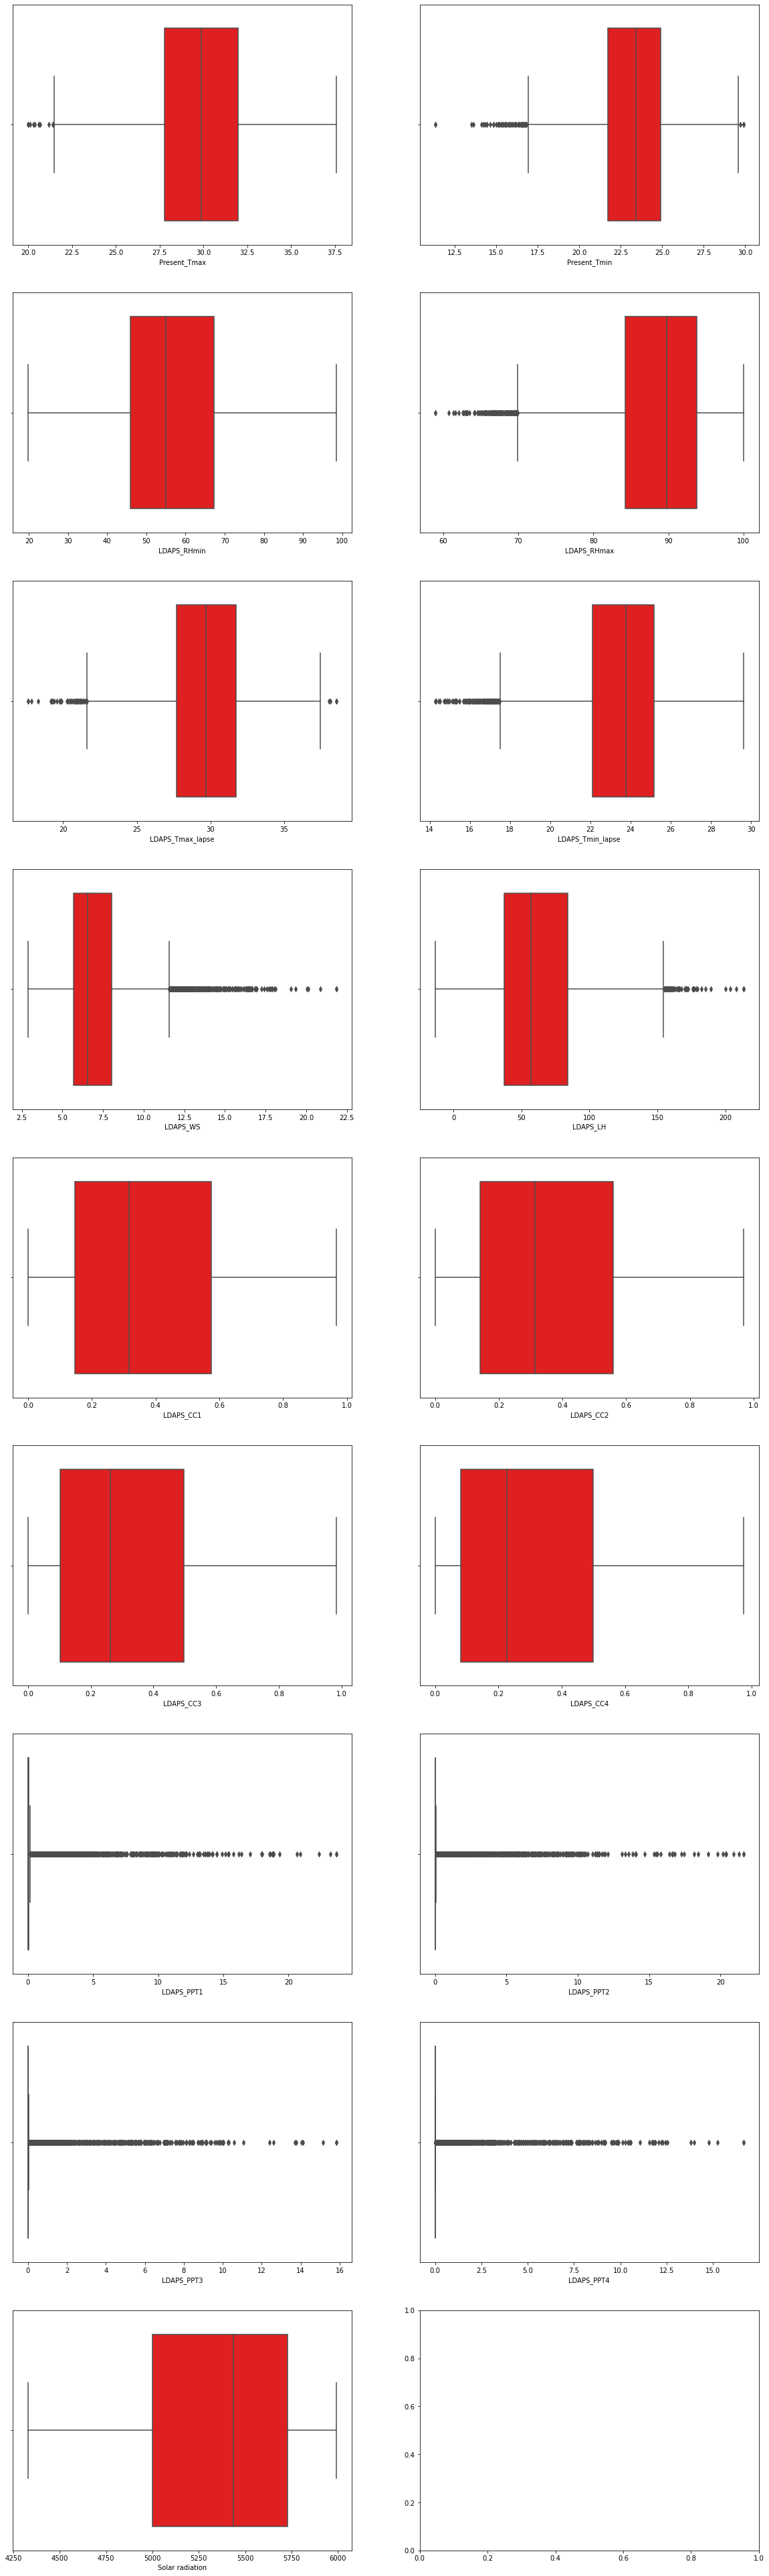

In [193]:
fig,ax=plt.subplots(9,2, figsize=(20,70))
r=0
c=0
for i, n in enumerate(temp[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(temp_df[n], color='r', ax=ax[r,c])
    c+=1

There a large no. of outliers especially in the precipitation data. Latent heat flux, wind speed, temperature applied lapse rate and Rhmax also have presence of outliers. While there are few in present day tmax and tmin also

# EDA Bivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

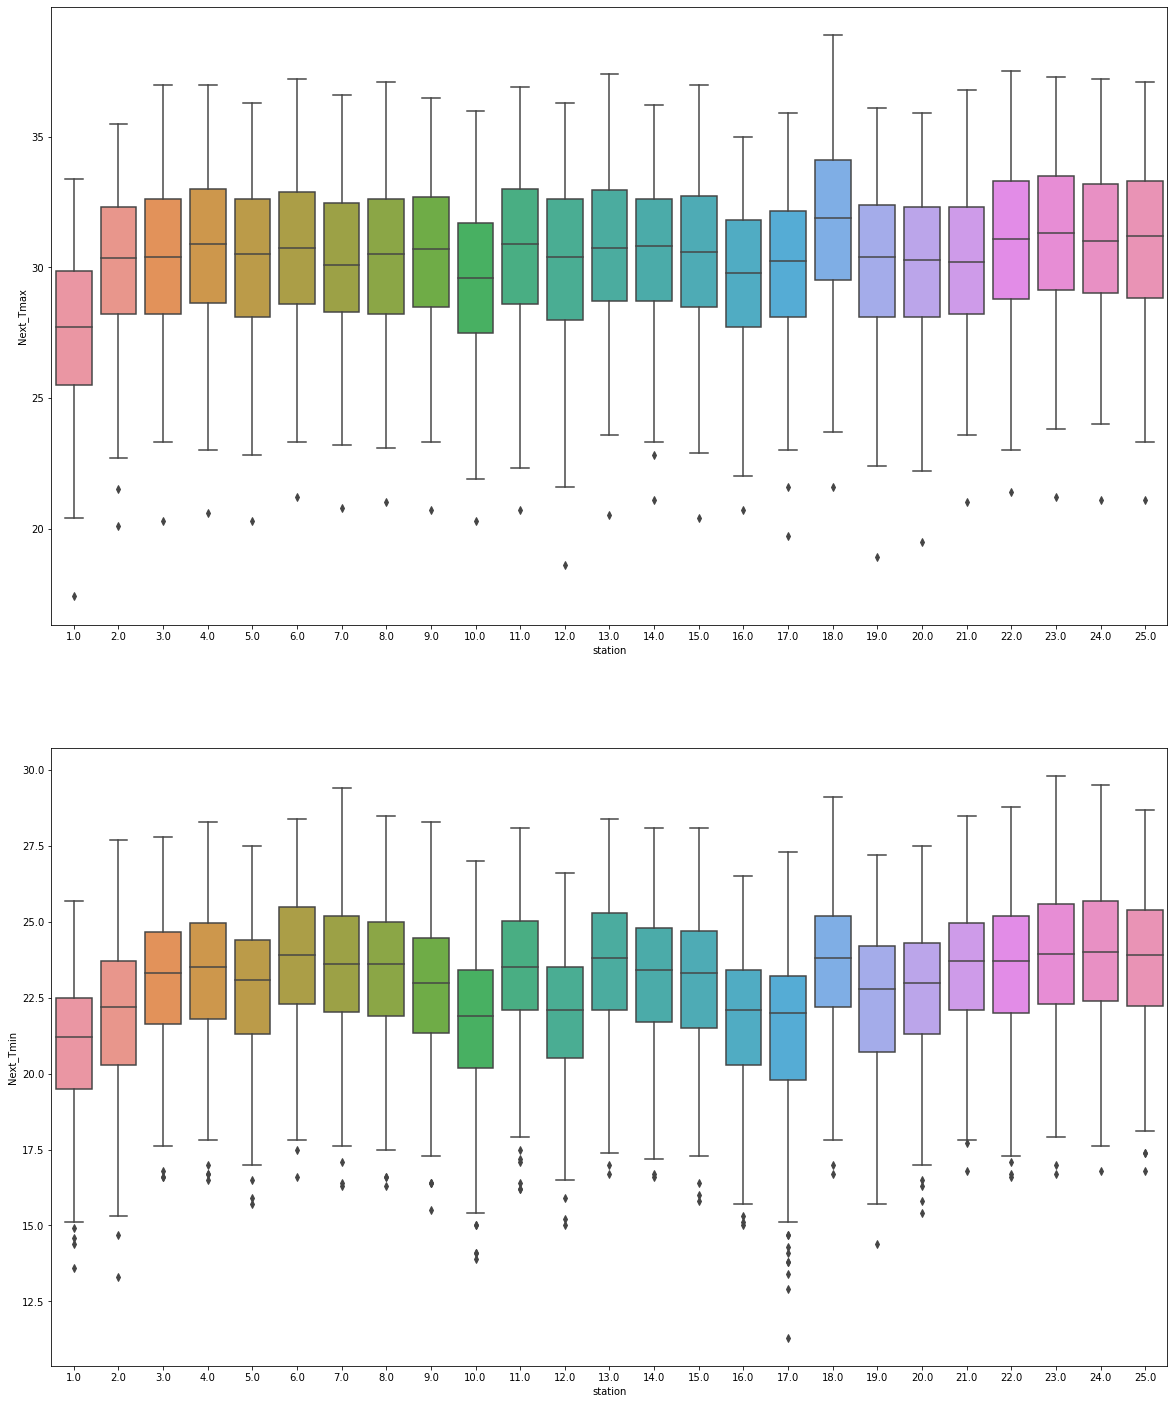

In [194]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
sns.boxplot(x='station', y='Next_Tmax', data=temp_df)
plt.subplot(2,1,2)
sns.boxplot(x='station', y='Next_Tmin', data=temp_df)

from the above graphs staion 18 observes a highest temp for both Tmax & Tmin ,while the station1 observes lowest temperature for both it could be becuse of their locations

In [195]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
sns.boxplot(x='lat', y='Next_Tmax', data=temp_df)
plt.subplot(2,1,2)
sns.boxplot(x='lat', y='Next_Tmin', data=temp_df)

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

temperature seems to fall as the latitude increases which is also a known fact. Heighest temperature is 37.645 for Tmax, while the Tmin this is not the case for him which could be becuse of the other factor that affect the temp 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

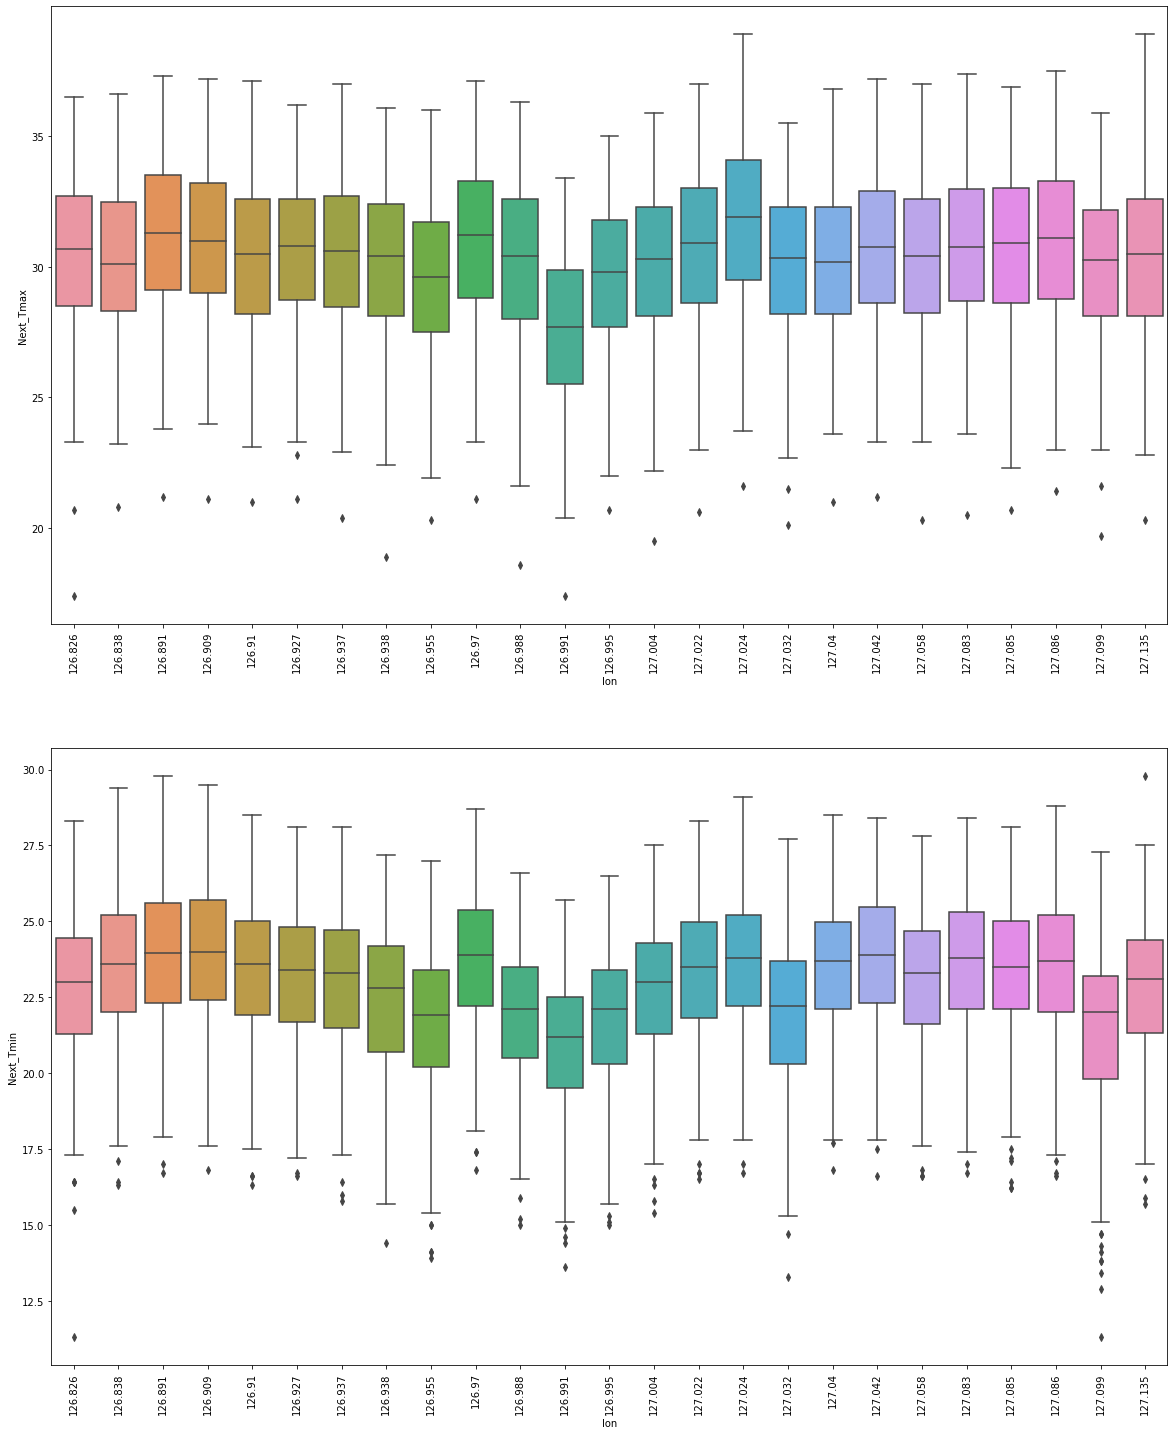

In [196]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
sns.boxplot(x='lon', y='Next_Tmax', data=temp_df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='lon', y='Next_Tmin', data=temp_df)
plt.xticks(rotation=90)

from the studies shows that longitude does not a affect the temp of a place. while from  the above graph it seen that as the logitude increses, temp increases for the first 4 longitudes then decreases for thr next 5, this increses decrease is carried on

In [197]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
sns.boxplot(x='DEM', y='Next_Tmax', data=temp_df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='DEM', y='Next_Tmin', data=temp_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

grom the above graophs shows that as the elevation increases, temp decreases. 

In [198]:
plt.figure(figsize=(20,25))
plt.subplot(2,1,1)
sns.boxplot(x='Slope', y='Next_Tmax', data=temp_df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='Slope', y='Next_Tmin', data=temp_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.0984746'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.697'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

a steep slope expreriences a more rapid change in temperature , lowest and highest temperature are observed at consecutive slope 0.697 and 0.8552

In [199]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day temp vs present day temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmin', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax', y='Next_Tmin', data=temp_df, marker='*', color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmin', y='Next_Tmin', data=temp_df, marker='*', color='k')

<AxesSubplot:title={'center':'Next day min Temperature Vs Present day max Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

there is a high positive correlation of Next day temp with present day temperature

<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

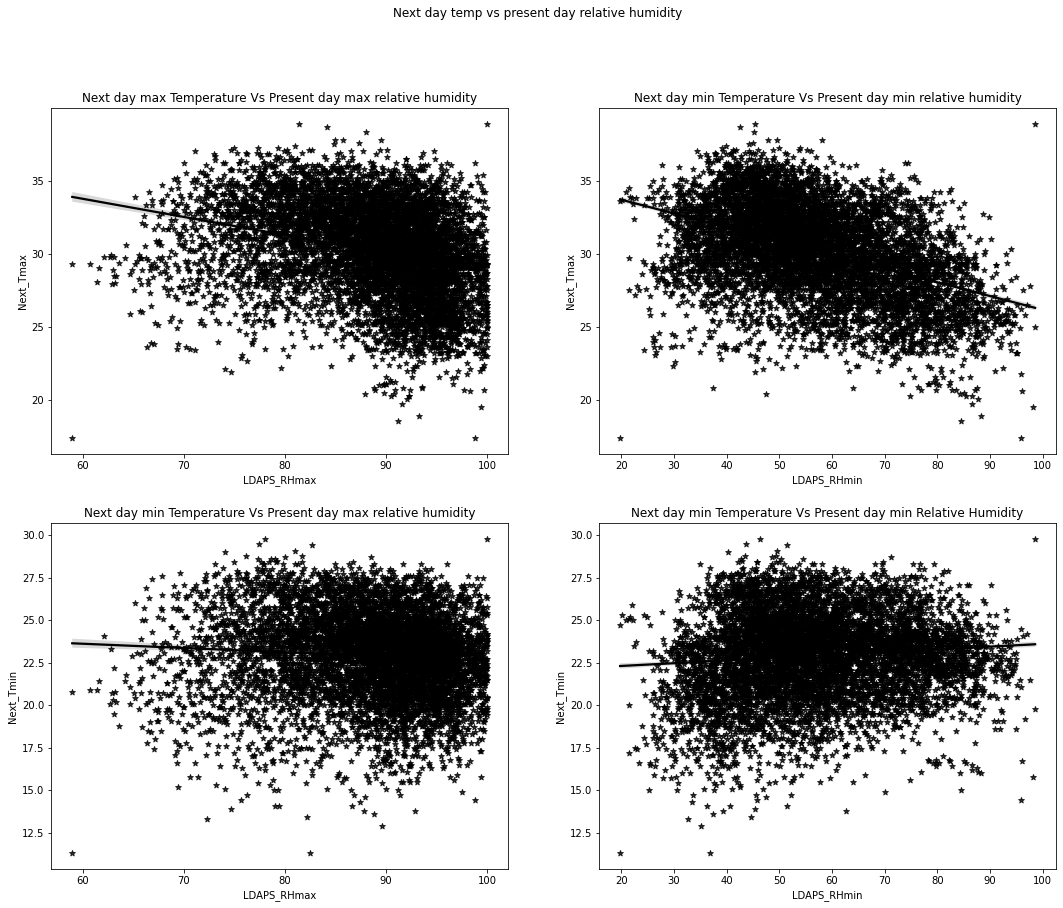

In [200]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day temp vs present day relative humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max relative humidity')
sns.regplot(x='LDAPS_RHmax', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs Present day min relative humidity')
sns.regplot(x='LDAPS_RHmin', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max relative humidity')
sns.regplot(x='LDAPS_RHmax', y='Next_Tmin', data=temp_df, marker='*', color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin', y='Next_Tmin', data=temp_df, marker='*', color='k')

Next day Tmax decreases with increases in RH max and RH min whike this is not the true for Tmin as Tmim seem to be unaffected by Rhmax and shows a slight poitive correlation with Rhmin

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

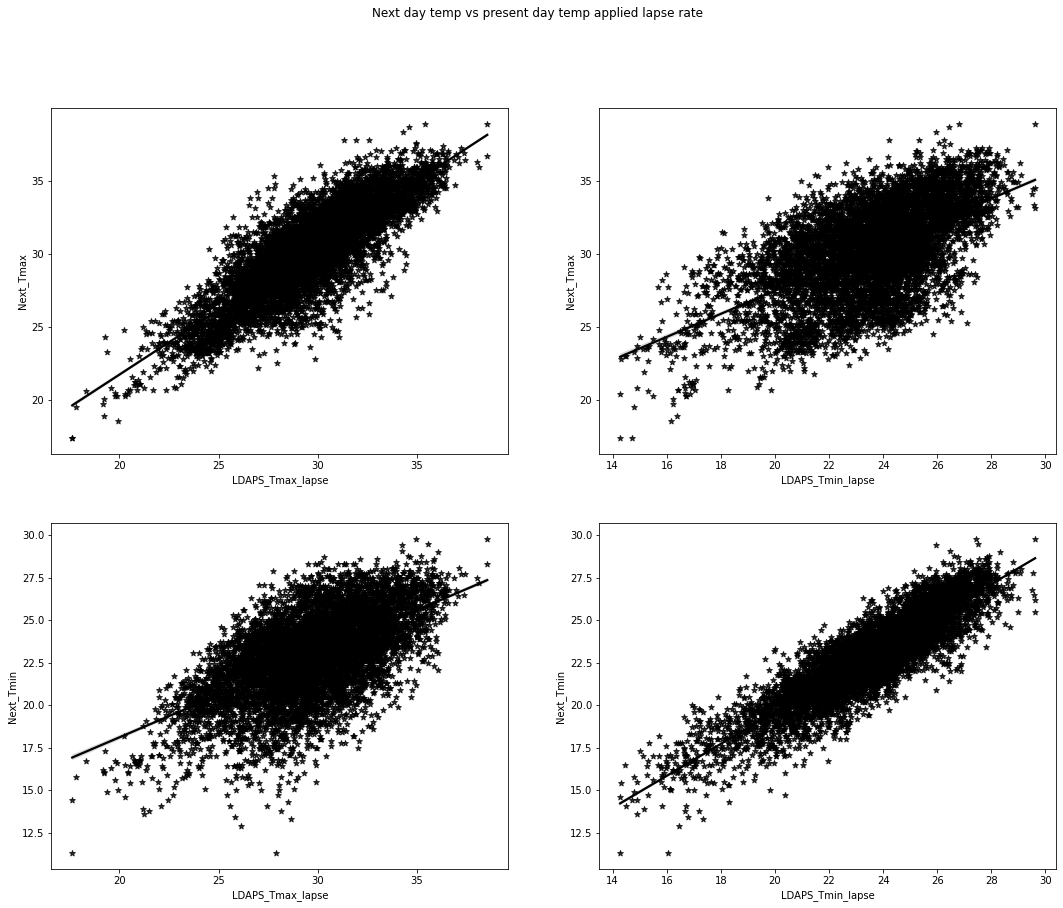

In [201]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day temp vs present day temp applied lapse rate')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmin', data=temp_df, marker='*', color='k')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data=temp_df, marker='*', color='k')

the baove graph shows poitive corelation of next day temp with the present day temp applied lapse rate. if one increses other also increses

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

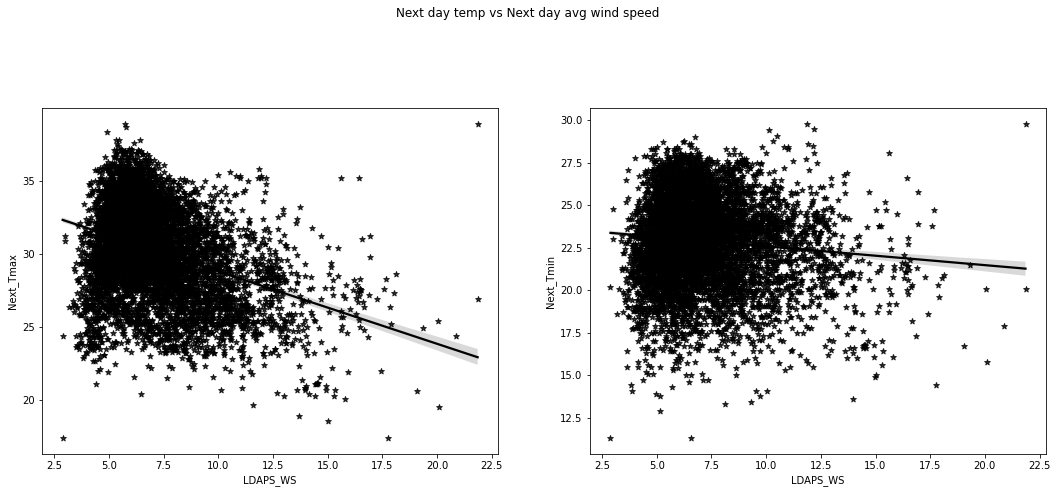

In [202]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day temp vs Next day avg wind speed')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data=temp_df, marker='*', color='k')



Temperature ddecreases as the wind speed increases. Tmax seem to decrease more drastically than Tmin

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

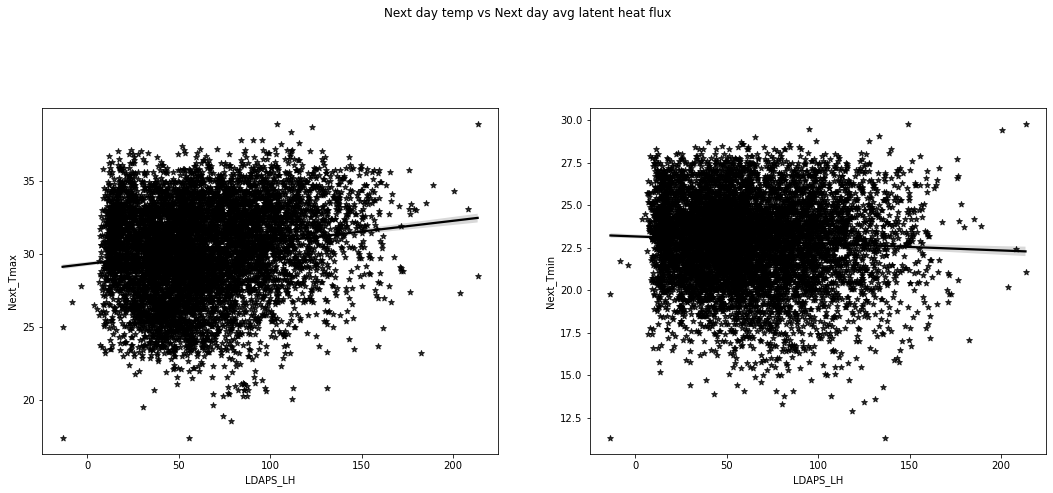

In [203]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day temp vs Next day avg latent heat flux')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data=temp_df, marker='*', color='k')


AS latent heat flux incrses Tmax also increases while Tmin decreases. latent heat flux seem to bring out extremes of temperature with its increase

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

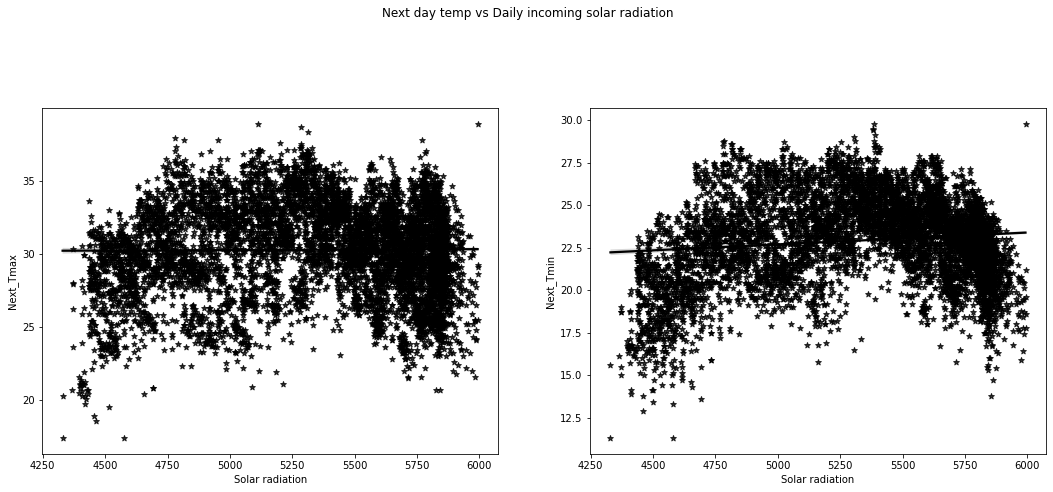

In [204]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day temp vs Daily incoming solar radiation')

plt.subplot(2,2,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data=temp_df, marker='*', color='k')

plt.subplot(2,2,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data=temp_df, marker='*', color='k')


Solar radiation does not seem to affect Tmax or Tmin even through studies have shown that air temp have their origin in the absorption of radiant energy from the sun

In [205]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day Max temp vs Next day average cloud cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data=temp_df, marker='*', color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data=temp_df, marker='*', color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data=temp_df, marker='*', color='b')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data=temp_df, marker='*', color='b')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

Tamx decreses as the cloud cover increase irrespectively of any split which is also what studies show

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

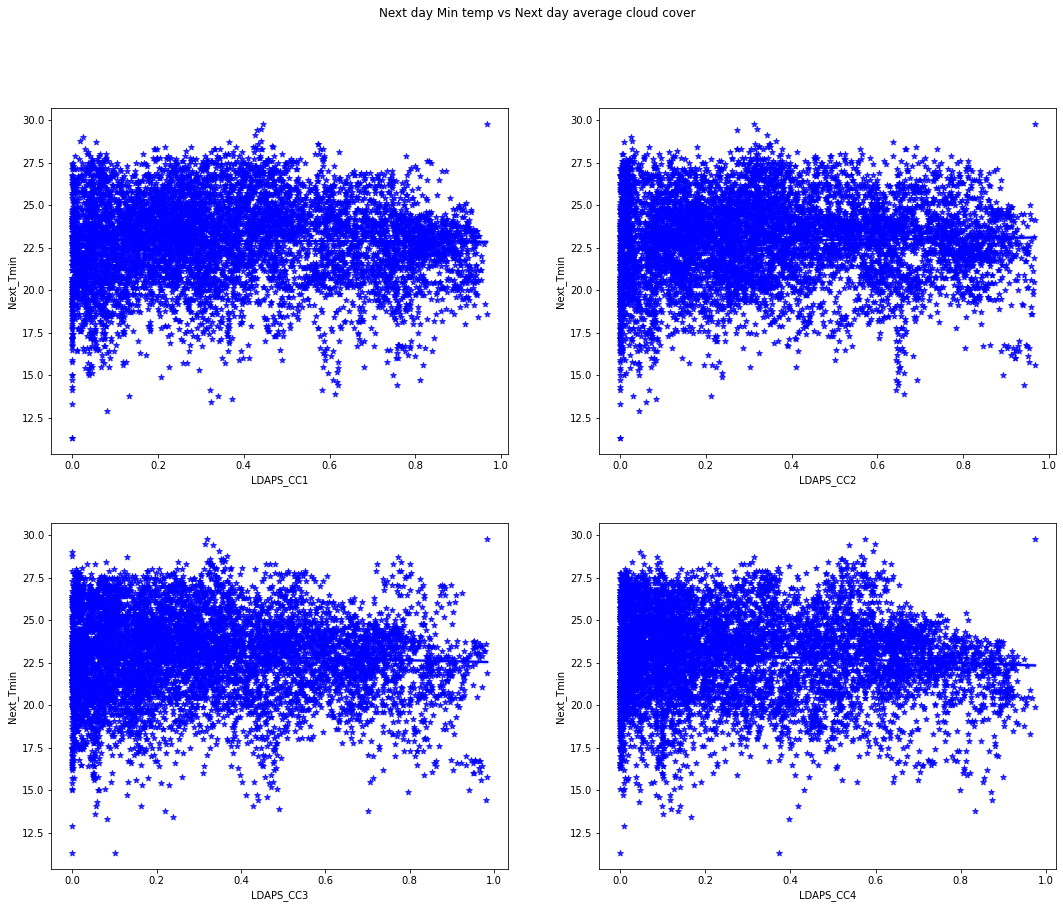

In [206]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day Min temp vs Next day average cloud cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data=temp_df, marker='*', color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data=temp_df, marker='*', color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data=temp_df, marker='*', color='b')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data=temp_df, marker='*', color='b')

Tmin seems to remain unaffeact by cloud cover as cloud cover is also responsible for green effect which increses the temp

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

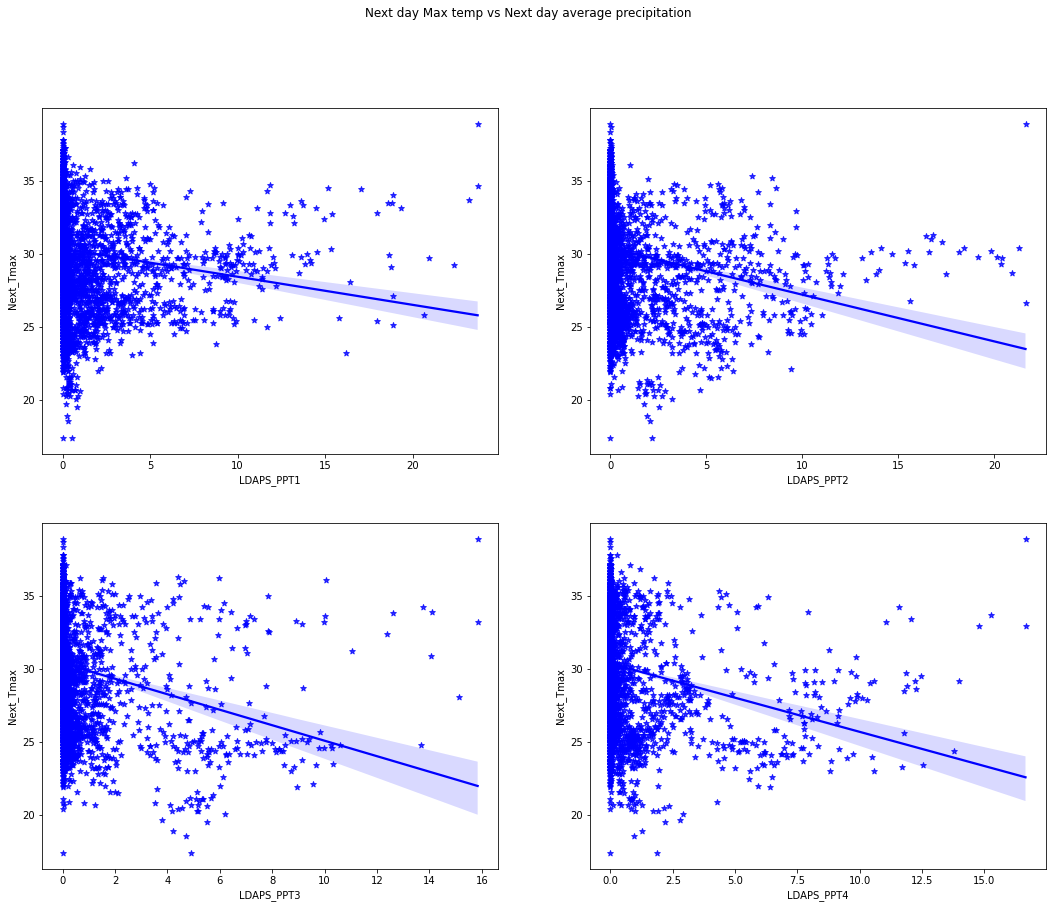

In [207]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day Max temp vs Next day average precipitation')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmax', data=temp_df, marker='*', color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmax', data=temp_df, marker='*', color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmax', data=temp_df, marker='*', color='b')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmax', data=temp_df, marker='*', color='b')

Tmax decreases as the preciopitation increses irrespective of any split which is also what studies show

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

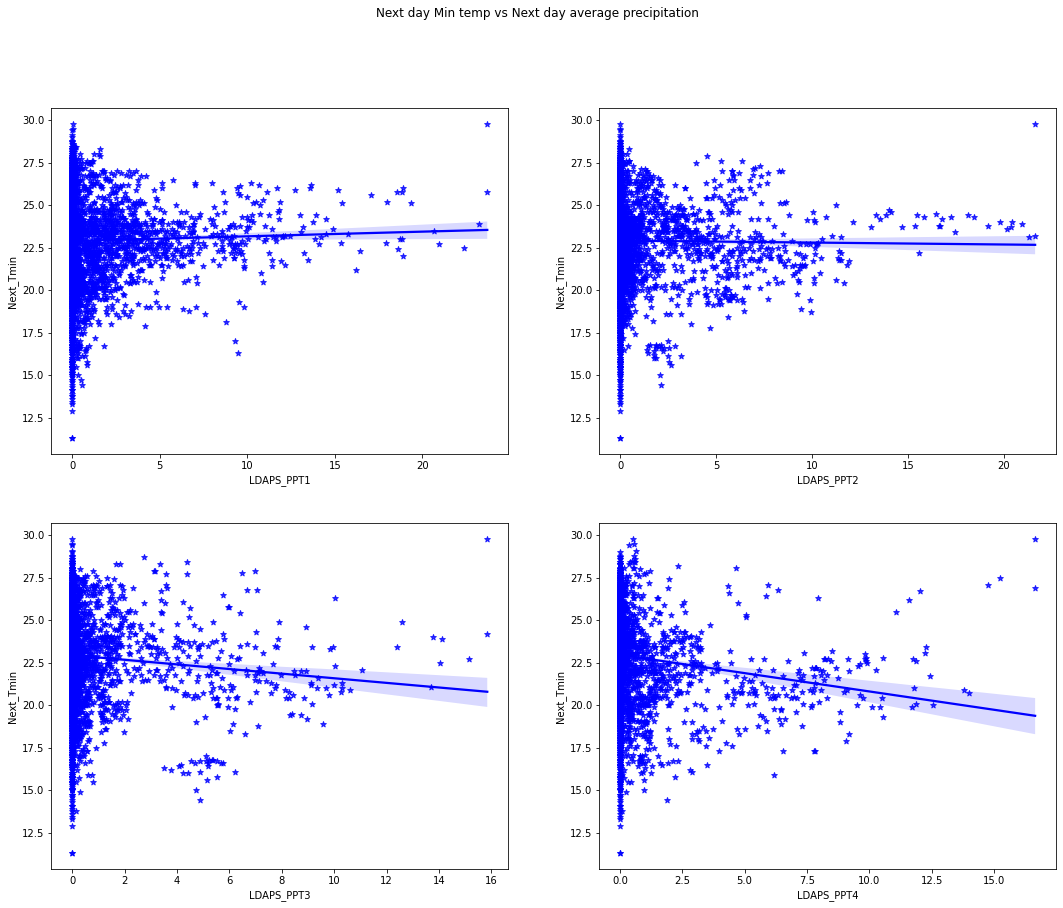

In [208]:
plt.figure(figsize=(18,14))
plt.suptitle('Next day Min temp vs Next day average precipitation')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmin', data=temp_df, marker='*', color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmin', data=temp_df, marker='*', color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmin', data=temp_df, marker='*', color='b')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmin', data=temp_df, marker='*', color='b')

there is very slight hange on increse of precipitation in Tmin. Tmin seem to decrease slightly as the precipaitation increses with later splits

# EDA Multivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

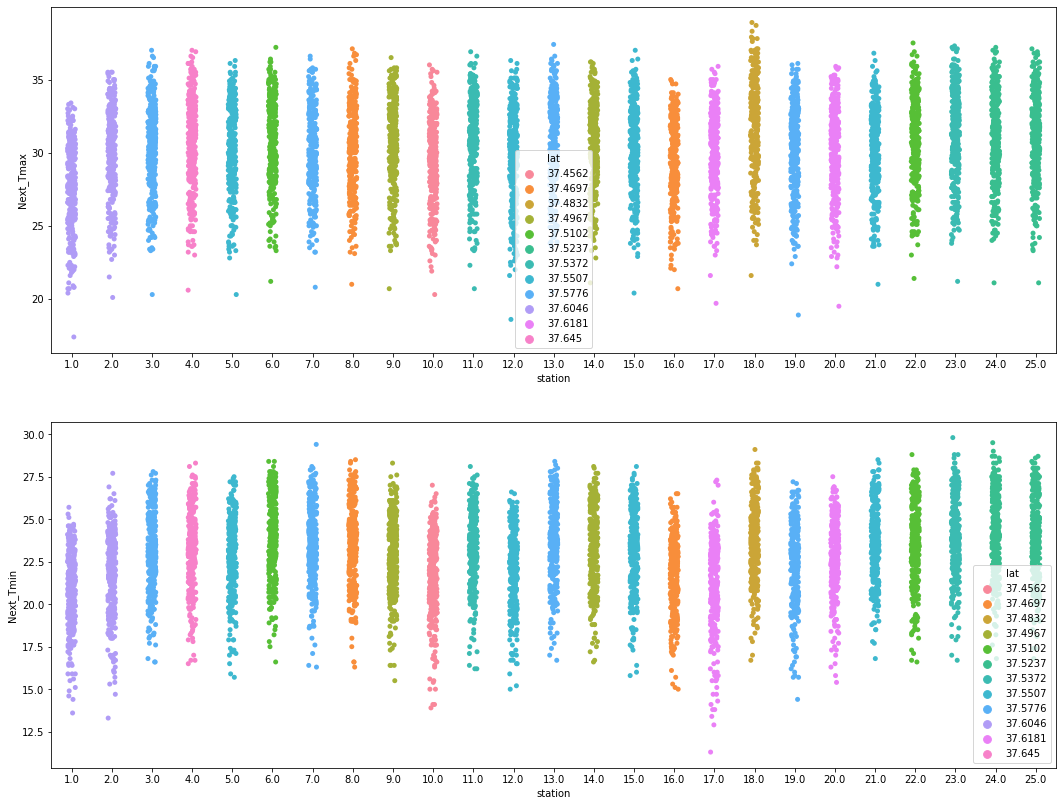

In [209]:
plt.figure(figsize=(18,14))

plt.subplot(2,1,1)
sns.stripplot(x='station', y='Next_Tmax', hue= 'lat',data=temp_df)

plt.subplot(2,1,2)
sns.stripplot(x='station', y='Next_Tmin', hue= 'lat' ,data=temp_df)


Each station is located on a particular latitude, There are almost 3 stations on a single latitude, and as the latitude decreses, temp seems to be increses

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

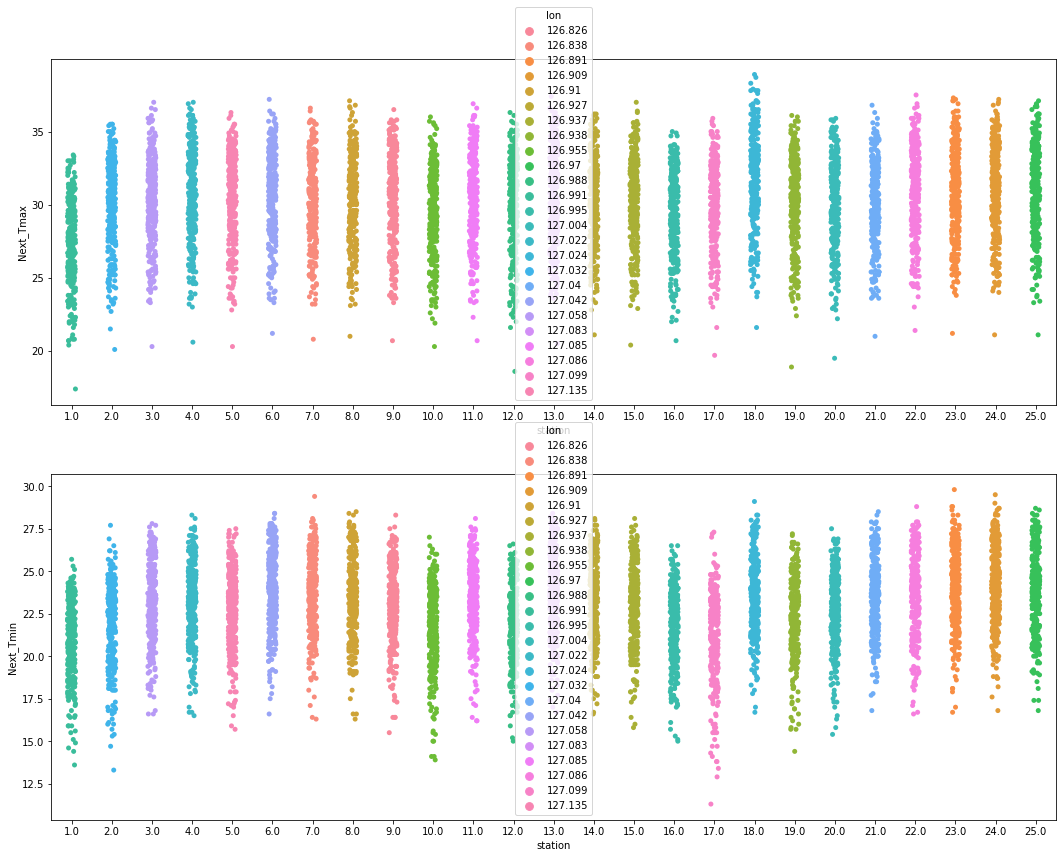

In [210]:
plt.figure(figsize=(18,14))

plt.subplot(2,1,1)
sns.stripplot(x='station', y='Next_Tmax', hue= 'lon',data=temp_df)

plt.subplot(2,1,2)
sns.stripplot(x='station', y='Next_Tmin', hue= 'lon' ,data=temp_df)

Ecah station belongs to a particular longitude. There is only ons ation belonging to alongitude. As the longitude do not affect the temperature much the graphs are similar to the station vs latitude

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

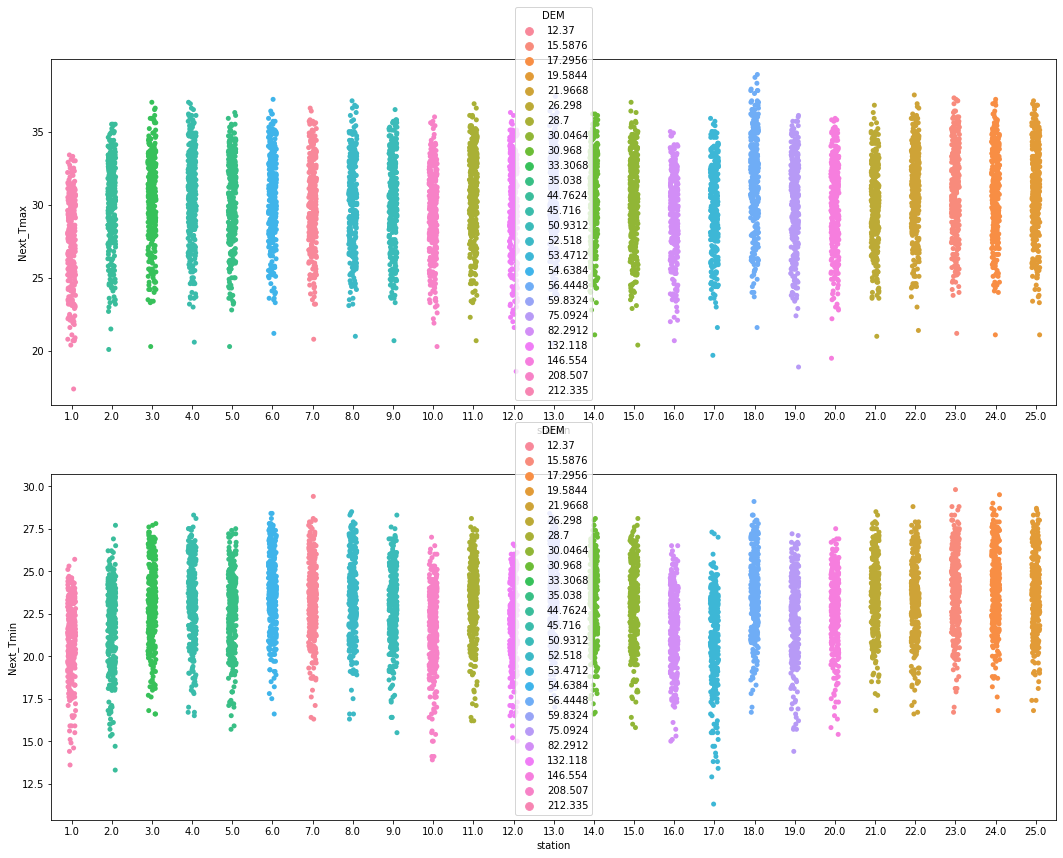

In [211]:
plt.figure(figsize=(18,14))

plt.subplot(2,1,1)
sns.stripplot(x='station', y='Next_Tmax', hue= 'DEM',data=temp_df)

plt.subplot(2,1,2)
sns.stripplot(x='station', y='Next_Tmin', hue= 'DEM' ,data=temp_df)

Each station belong to a particular elevation. There is only one statiton belonging to a particular elevation. Highest tmax is noted at station 18 which have an elevation 56.44 even though it is not the lowest elevation, which indicates that elevation alone does not decide the temperature

In [212]:
plt.figure(figsize=(18,14))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1', y='LDAPS_CC1', hue='Next_Tmin',data=temp_df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2', y='LDAPS_CC2', hue='Next_Tmin',data=temp_df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3', y='LDAPS_CC3', hue='Next_Tmin',data=temp_df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4', y='LDAPS_CC4', hue='Next_Tmin',data=temp_df)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

In the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses 0.3 wjile this threshold increases to 0.5 in 2nd split after that decreases for all the splits. Tmin is higher when there cloud cover and precipitation both have lower value.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

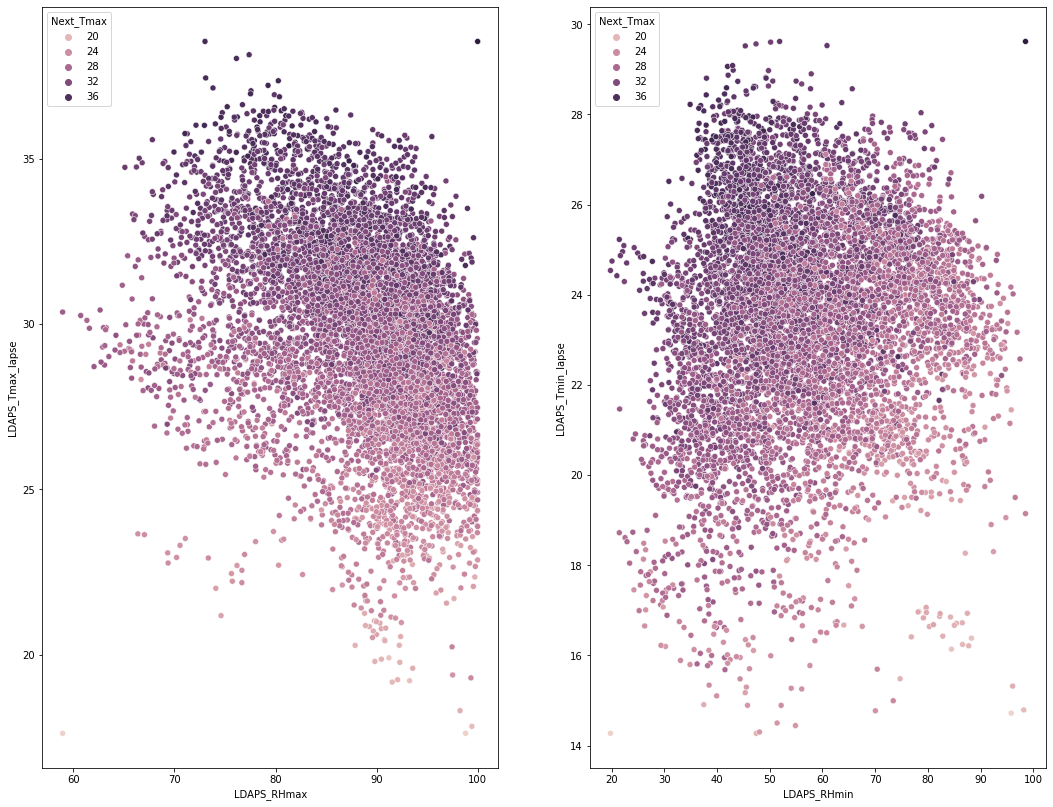

In [213]:
plt.figure(figsize=(18,14))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax', y='LDAPS_Tmax_lapse', hue='Next_Tmax',data=temp_df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin', y='LDAPS_Tmin_lapse', hue='Next_Tmax',data=temp_df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmax also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmax decreases

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

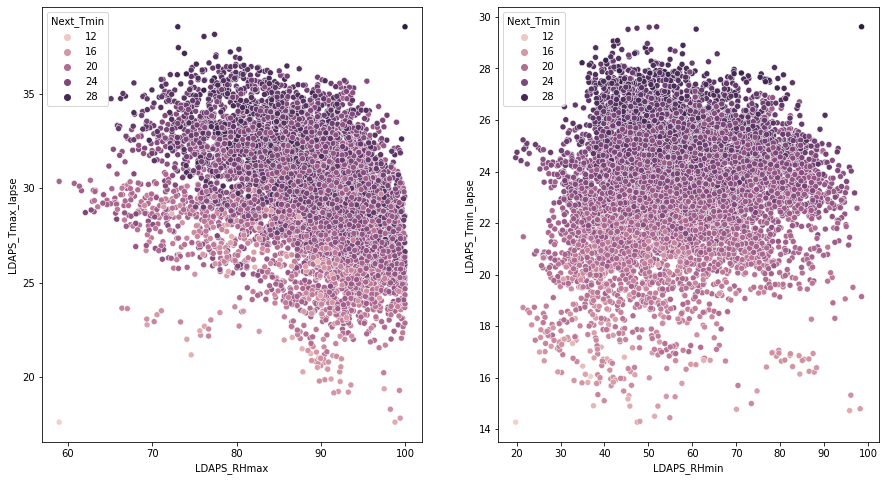

In [214]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmin',data=temp_df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmin',data=temp_df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmin also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmin decreases

# Pre-processing pipeline

In [215]:
#dropping the data columns
temp_df.drop('Date',axis=1, inplace=True)

In [216]:
#Rounding off the value of slope
temp_df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

From the above data all data are rounded with four digits from the last two values the data is not rounded

In [217]:
temp_df['Slope'].replace({0.0984746:0.0985, 5.17823: 5.1782}, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.697'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

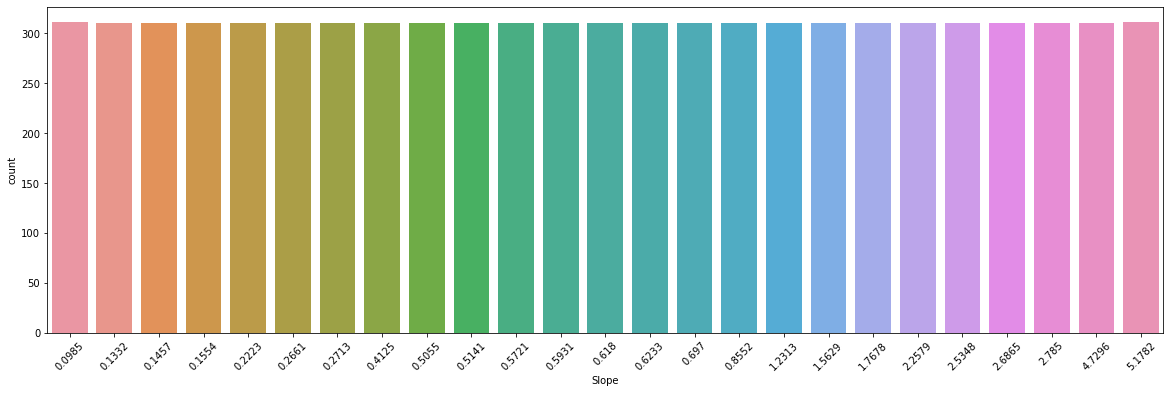

In [218]:
plt.figure(figsize=(20,6))
sns.countplot(temp_df['Slope'])
plt.xticks(rotation=45)


Now there is no ambigous values

importing null values

In [219]:
from scipy.stats import mode

Next Tmax and Tmin columns

In [220]:
#We need to drop these rows as these are the label columns cannot impute null values to these 
temp_df=temp_df[temp_df['Next_Tmax'].notnull()]

sataion column

In [221]:
table=pd.pivot_table(values='station',index='Slope', data=temp_df)
table.head()

station
Slope          
0.0985      7.0
0.1332     22.0
0.1457      6.0
0.1554     23.0
0.2223     24.0

filling nan values of sation from slope column as slope as an identifier columns to station

In [222]:
temp_df.isnull().sum()

station              2
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

In [223]:
#first check null value ---sum of all the null value -----check the sum of all the values
temp_df.isnull().sum().sum()

1172

In [224]:
# Finding the percentage of null value in case there is null values in features
(temp_df.isnull().sum()/(len(temp_df)))*100

station             0.025890
Present_Tmax        0.776699
Present_Tmin        0.776699
LDAPS_RHmin         0.970874
LDAPS_RHmax         0.970874
LDAPS_Tmax_lapse    0.970874
LDAPS_Tmin_lapse    0.970874
LDAPS_WS            0.970874
LDAPS_LH            0.970874
LDAPS_CC1           0.970874
LDAPS_CC2           0.970874
LDAPS_CC3           0.970874
LDAPS_CC4           0.970874
LDAPS_PPT1          0.970874
LDAPS_PPT2          0.970874
LDAPS_PPT3          0.970874
LDAPS_PPT4          0.970874
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.000000
Next_Tmin           0.000000
dtype: float64

In [225]:
sns.heatmap(temp_df.isnull())

<AxesSubplot:>

In [226]:
#deketing rows which have atlest 14 null values
temp_df.dropna(subset=temp_df.columns, thresh=14,inplace=True)

In [227]:
#Present Tmax and Tmin

#We are dropping these null values as weel because upon evalution this gives better result than imputing these with mean values
temp_df.dropna(inplace=True)

In [228]:
sns.heatmap(temp_df.isnull())

<AxesSubplot:>

No null values

Removing Outliers

In [229]:
#Using zscore method to remove outliers
from scipy.stats import zscore

In [230]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [231]:
z=np.abs(zscore(temp_df))
threhold(z,temp_df)

With threshold 3.0 data loss is 11.19%
With threshold 3.2 data loss is 9.66%
With threshold 3.4 data loss is 8.45%
With threshold 3.6 data loss is 7.7%
With threshold 3.8 data loss is 6.96%
With threshold 4.0 data loss is 6.31%
With threshold 4.2 data loss is 5.88%
With threshold 4.4 data loss is 5.27%
With threshold 4.6 data loss is 4.82%
With threshold 4.8 data loss is 4.39%


In [232]:
#We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
temp_df=temp_df[(z<4.2).all(axis=1)]

Removing Skewness

In [233]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [234]:
for i in temp:
    if np.abs(temp_df[i].skew())>=0.5:
        temp_df[i]=pt.fit_transform(temp_df[i].values.reshape(-1,1))

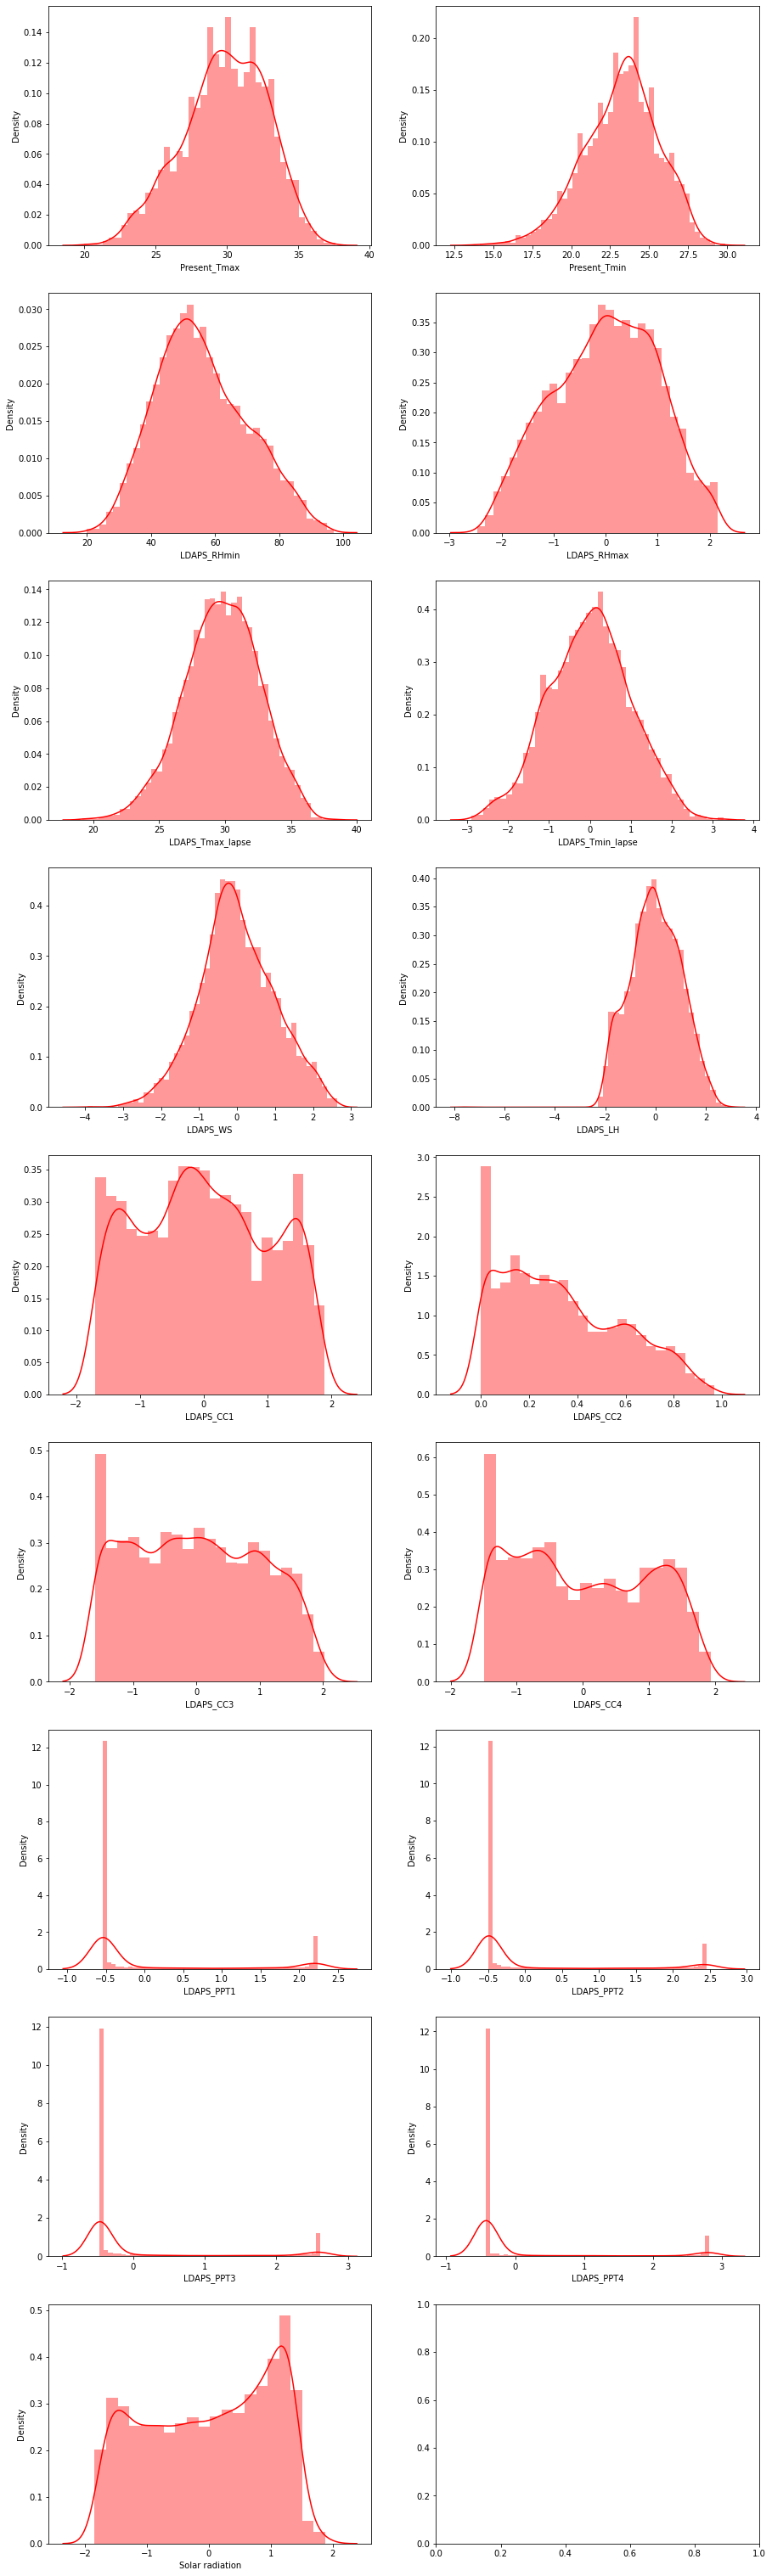

In [235]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(temp[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(temp_df[n],color='r',ax=ax[r,c])
    c+=1

Skewness is reduced considerably

In [236]:
#Separating dependent and independent features.
x=temp_df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=temp_df['Next_Tmax']
ymin=temp_df['Next_Tmin']

Scaling the dataset

In [237]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [238]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

Modelling Phase

Importing necessary libraries

In [239]:
from sklearn.model_selection import train_test_split,cross_val_score

In [240]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [241]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [242]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [243]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [244]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [245]:
createmodels(models,x,ymax,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     1.0438              1.9286   
SVR                                     0.8461              1.3286   
LinearRegression                        1.0455              1.8499   
Lasso                                   2.4453              8.8967   
Ridge                                   1.0446              1.8511   
DecisionTreeRegressor                   0.9930              1.9766   
RandomForestRegressor                   0.7171              0.9214   
AdaBoostRegressor                       1.1922              2.1751   
GradientBoostingRegressor               0.8891              1.3171   

                           Root Mean Squared Error      R2 Score  \
Model                                                              
KNeighborsRegressor                         1.3887  7.000000e+01   
SVR                                         1.1526  8.200000e+01   
LinearRegression                            1.3601  7.400000e+01   
Lasso                                       2.9827 -7.048728e+31   
Ridge                                       1.3606  7.400000e+01   
DecisionTreeRegressor                       1.4059  7.900000e+01   
RandomForestRegressor                       0.9599  8.700000e+01   
AdaBoostRegressor                           1.4748  6.300000e+01   
GradientBoostingRegressor                   1.1477  8.200000e+01   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  47.0  
SVR                                                  65.0  
LinearRegression                                     70.0  
Lasso                                                -7.0  
Ridge                                                70.0  
DecisionTreeRegressor                                45.0  
RandomForestRegressor                                68.0  
AdaBoostRegressor                                    67.0  
GradientBoostingRegressor                            70.0

For pedicting Next day Maximum Temperature Random Forest, Xtreme Gradient Boost give the least error value while Ridge regressor is giving the highest mean of cross validation score along with Gradient Boosting Model.

In [246]:
createmodels(models,x,ymin,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.8201              1.1841   
SVR                                     0.6112              0.6193   
LinearRegression                        0.7644              0.9232   
Lasso                                   1.9588              5.9773   
Ridge                                   0.7645              0.9225   
DecisionTreeRegressor                   0.8548              1.3352   
RandomForestRegressor                   0.5688              0.5528   
AdaBoostRegressor                       0.8604              1.1288   
GradientBoostingRegressor               0.6310              0.6443   

                           Root Mean Squared Error  R2 Score  \
Model                                                          
KNeighborsRegressor                         1.0881      70.0   
SVR                                         0.7870      88.0   
LinearRegression                            0.9608      82.0   
Lasso                                       2.4449       0.0   
Ridge                                       0.9605      81.0   
DecisionTreeRegressor                       1.1555      77.0   
RandomForestRegressor                       0.7435      89.0   
AdaBoostRegressor                           1.0624      75.0   
GradientBoostingRegressor                   0.8027      87.0   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  47.0  
SVR                                                  75.0  
LinearRegression                                     78.0  
Lasso                                               -14.0  
Ridge                                                78.0  
DecisionTreeRegressor                                57.0  
RandomForestRegressor                                78.0  
AdaBoostRegressor                                    74.0  
GradientBoostingRegressor                            80.0

Same is the case while prediction Next day minimum temperature as Random Forest, Xtreme Gradient Boost give the least error value while Gradient Boost is giving the highest mean of cross validation score.

Reducing Multicollinearity using Lasso

For Tmax

In [247]:
from sklearn.model_selection import GridSearchCV

In [248]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [249]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [250]:
importance = np.abs(m1.coef_)

In [251]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

Features  Coefficients
0            station      0.414879
1       Present_Tmax      2.893795
2       Present_Tmin      0.446038
3        LDAPS_RHmin      1.864469
4        LDAPS_RHmax      0.031077
5   LDAPS_Tmax_lapse     12.244269
6   LDAPS_Tmin_lapse      1.269848
7           LDAPS_WS      1.790647
8           LDAPS_LH      2.673350
9          LDAPS_CC1      0.291536
10         LDAPS_CC2      0.624178
11         LDAPS_CC3      0.508918
12         LDAPS_CC4      1.268095
13        LDAPS_PPT1      0.509906
14        LDAPS_PPT2      0.235777
15        LDAPS_PPT3      0.145450
16        LDAPS_PPT4      0.202230
17               lat      0.114069
18               lon      0.495785
19               DEM      0.731490
20             Slope      0.766536
21   Solar radiation      0.214956

None of the features coefficients have been reduced to zero.

For Tmin

In [252]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymin)
print(m1.best_params_)

{'alpha': 0.001}


In [253]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymin)

Lasso(alpha=0.001)

In [254]:
importance = np.abs(m1.coef_)

In [255]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

Features  Coefficients
0            station      0.000000
1       Present_Tmax      0.945348
2       Present_Tmin      3.796597
3        LDAPS_RHmin      1.725220
4        LDAPS_RHmax      0.562750
5   LDAPS_Tmax_lapse      2.433243
6   LDAPS_Tmin_lapse      8.339272
7           LDAPS_WS      0.612477
8           LDAPS_LH      0.238134
9          LDAPS_CC1      0.000000
10         LDAPS_CC2      0.389434
11         LDAPS_CC3      0.013656
12         LDAPS_CC4      0.057020
13        LDAPS_PPT1      0.276027
14        LDAPS_PPT2      0.457960
15        LDAPS_PPT3      0.125597
16        LDAPS_PPT4      0.303647
17               lat      0.162898
18               lon      0.173483
19               DEM      1.465057
20             Slope      1.040179
21   Solar radiation      0.086698

Station column's coefficient has been reduced to zero, so we drop this feature and then check the performances of our model.

In [256]:
xlasso=x.drop('station',axis=1)

In [257]:
createmodels(models,xlasso,ymin,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.7397              0.9733   
SVR                                     0.6082              0.6085   
LinearRegression                        0.7641              0.9226   
Lasso                                   1.9588              5.9773   
Ridge                                   0.7642              0.9220   
DecisionTreeRegressor                   0.8689              1.3735   
RandomForestRegressor                   0.5660              0.5454   
AdaBoostRegressor                       0.8565              1.1276   
GradientBoostingRegressor               0.6311              0.6406   

                           Root Mean Squared Error  R2 Score  \
Model                                                          
KNeighborsRegressor                         0.9866      78.0   
SVR                                         0.7801      88.0   
LinearRegression                            0.9605      82.0   
Lasso                                       2.4449       0.0   
Ridge                                       0.9602      81.0   
DecisionTreeRegressor                       1.1720      77.0   
RandomForestRegressor                       0.7385      89.0   
AdaBoostRegressor                           1.0619      75.0   
GradientBoostingRegressor                   0.8004      87.0   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  46.0  
SVR                                                  74.0  
LinearRegression                                     78.0  
Lasso                                               -14.0  
Ridge                                                78.0  
DecisionTreeRegressor                                55.0  
RandomForestRegressor                                78.0  
AdaBoostRegressor                                    74.0  
GradientBoostingRegressor                            80.0

Performances of models have increased, Errors have been reduced and mean cross validation score of XGBRegressor has increased. So we keep this dataset for predicting Next day minumum Temperature.

Hyperparameter Tuning

For Next day Maximum Temperature¶

In [258]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))

Ridge Regressor

In [259]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

In [260]:
g=GridSearchCV(Ridge(),params,cv=10)

In [261]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [262]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=0.1)
{'alpha': 0.1}
0.7613510980752365


In [263]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [264]:
score=cross_val_score(m,x,ymax,cv=10)

In [265]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0453
Mean Squared Error is 1.8499
Root Mean Squared Error is 1.3601
R2 Score is 73.89
Mean of cross validaton Score is 66.3539


Random Forest

In [266]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [267]:
from sklearn.model_selection import RandomizedSearchCV

In [268]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [269]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [270]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=300)
{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 15}
0.8816254359616428


In [271]:
m=RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,n_estimators=200)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [272]:
score=cross_val_score(m,x,ymax,cv=10)

In [273]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7275
Mean Squared Error is 0.943
Root Mean Squared Error is 0.9711
R2 Score is 87.11
Mean of cross validaton Score is 64.6652


Graidient Boost

In [274]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [275]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

For Next day Minimun Temperature

In [285]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(xlasso,ymin,test_size=0.25,random_state=randomstate(xlasso,ymin))

Graidient Boost

In [286]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [287]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [288]:
g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [289]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=8, subsample=0.5)
0.926488058071719


In [290]:
m=GradientBoostingRegressor(max_depth=9, n_estimators=200, subsample=0.5)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)

In [291]:
score=cross_val_score(m,xlasso,ymin,cv=10)

In [292]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4684
Mean Squared Error is 0.3822
Root Mean Squared Error is 0.6182
R2 Score is 92.94
Mean of cross validaton Score is 74.7557


Concluding Remarks¶

There is high Bias in our model for this dataset as we are getting a very good R2 score but K-Fold cross validation score is quite low. Even though we have removed outliers and used ensemble techniques and reduced biasing to the minimum, still it remains.